# STA 141B: Homework 3
Winter 2018

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [60]:
import pandas as pd
import os.path
import numpy as np

Step 1: Function 

In [61]:
# Function for E1.1
def food_data(path):
    '''Read the excel files and extract the data of our interets
    
    Arguments: the path of file
    
    Return:  a dataframe
    '''
    
    # read file
    df = pd.read_excel(path)
    
    # create a selection list which will select the Fresh1 row)
    
    #is_fresh = df.iloc[:,0].str.contains('Fresh1').fillna(False)  # correct for 1.1
    #is_fresh = df.iloc[:,0].str.find('Fresh').fillna(False) # test for 1.2 
    
    is_fresh = df.iloc[:,0].str.contains('Fresh*').fillna(False) # correction for tomatoes
    
    df=df.loc[is_fresh,:]
    df=df.iloc[:,0:7]      # correction for pineapple
    
    # extract food and type fron the path
    n = os.path.splitext(path) # split the filename and type
    food_name = n[0].split('/')[7]
    type_name = n[0].split('/')[6]
    
    # Correct the column to mathc the example
    df = df.drop(df.columns[[2,5]], axis =1) #  Remove Unnamed: 2 and Unnamed: 5
    df.columns = ['form', 'price_per_lb','yield', 'lb_per_cup','price_per_cup'] # rename the col
    
    # add the type and food
    df.insert(0,'food',food_name)
    df.insert(0,'type',type_name)
    
    return df

Step 2: Read all files in the fruit directory

In [63]:
# set the working directory
path = 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/fruit'
file_list = os.listdir(path) # this will list all the file names in my working directory

In [64]:
# manually create a complete path for each excel file
newPath = [path + '/' + excel for excel in file_list]
#newPath

Step 3: Let's read all the files in the fruit directory

In [65]:
F_Data = pd.DataFrame(pd.np.empty((0, 7))) # create a empty dataframe with 7 cols
F_Data.columns = ['type','food','form', 'price_per_lb','yield', 'lb_per_cup','price_per_cup']

for i in newPath:
    F_Data = F_Data.append(food_data(i)) 

In [66]:
# Test for the Fruit dataframe
F_Data.head(10)

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
2,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
2,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
2,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
2,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
2,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
2,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
2,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
2,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

__Ans a:__ The form of toatoes is Fresh, not "Fresh1". Thus, I swith to match the string that has any sub-string as "Fresh". After this correction of my function, my functoin can get tomatoes into the dataframe. However, its excel file had no data entry for features of our interest, so the row of tomatoes were all NA.  

__Ans b:__ There were other files with similar issues as tomatoes file, such as  broccoli, cauliflower, and so forth. These files have no entries for features of our interest.

Step 2: Read all files in the <strong style="color:#B0B">vegetable</strong> directory

In [67]:
# set the working directory
path = 'C:/Users/WeiKuang/Documents/GitHub/sta141b-hw3-Wei-Kuang/vegetables'
file_list = os.listdir(path) # this will list all the file names in my working directory

In [68]:
# manually create a complete path for each excel file
newPath = [path + '/' + excel for excel in file_list]

Step 3: Let's read all the files in the <strong style="color:#B0B">vegetable</strong> directory

In [69]:
V_Data = pd.DataFrame(pd.np.empty((0, 7))) # create a empty dataframe with 7 cols
V_Data.columns = ['type','food','form', 'price_per_lb','yield', 'lb_per_cup','price_per_cup']

for i in newPath:
    V_Data = V_Data.append(food_data(i)) 

In [70]:
# Check for Vegetables dataframe
V_Data

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
2,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
2,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
2,vegetables,broccoli,Fresh,,,,NaN
2,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
2,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
2,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
3,vegetables,cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
2,vegetables,carrots,Fresh,NaN,NaN,NaN,NaN


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [74]:
#Remove rows without a price from the vegetable data frame
V_Data = V_Data.dropna(axis=0, how='any')
print(V_Data.shape) # Vegetables data has 25 rows now
V_Data

(25, 7)


,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.15536
2,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.27497
2,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.58227
2,vegetables,avocados,Fresh1,2.23587,0.740753,0.31967,0.964886
2,vegetables,brussels_sprouts,Fresh1,2.76355,1.06,0.341717,0.890898
2,vegetables,butternut_squash,Fresh1,1.24474,0.714,0.451948,0.787893
2,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944
3,vegetables,cabbage,Fresh red cabbage1,1.05645,0.779107,0.330693,0.448412
2,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001
2,vegetables,corn_sweet,Fresh1,2.69062,0.54,0.363763,1.8125


In [75]:
# combine the fruit and vegetable data frames 
FV_Data = F_Data.append(V_Data)

In [76]:
# Check the combined dataframe
FV_Data

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,fruit,apples,Fresh1,1.56752,0.9,0.242508,0.422373
2,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
2,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
2,fruit,blueberries,Fresh1,4.73462,0.95,0.31967,1.59318
2,fruit,cantaloupe,Fresh1,0.535874,0.51,0.374786,0.3938
2,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
2,fruit,grapefruit,Fresh1,0.897802,0.49,0.462971,0.848278
2,fruit,grapes,Fresh1,2.09383,0.96,0.330693,0.721266
2,fruit,honeydew,Fresh1,0.796656,0.46,0.374786,0.649077


In [78]:
# Make sure all columns of numbers are numeric (not strings).
FV_Data = FV_Data.apply(pd.to_numeric, errors='ignore')

#Note for the code: apply(pd.to_numeric, errors='ignore')
#df.apply(pd.to_numeric, errors='ignore')
#hen the function will be applied to the whole DataFrame. 
#Columns that can be converted to a numeric type will be converted, while columns that cannot
#(e.g. they contain non-digit strings or dates) will be left alone.

In [79]:
FV_Data.head()

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
2,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
2,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
2,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
2,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177


In [80]:
# Check if all the numeric columns have numeric data type
print( FV_Data['type'].dtype )
print( FV_Data['food'].dtype )
print( FV_Data['form'].dtype )

print( FV_Data['price_per_lb'].dtype )
print( FV_Data['yield'].dtype )
print( FV_Data['lb_per_cup'].dtype )
print( FV_Data['price_per_cup'].dtype )

object
object
object
float64
float64
float64
float64


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [81]:
# correct the index of my dataframe
FV_Data= FV_Data.reset_index()
FV_Data.head()

,index,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,2,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
1,2,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
2,2,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
3,2,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
4,2,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177


### What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

__ANS:__ Raspberries is the most expensive,  \$ 6.97581 per pound.
Watermelon is the least expensive,  \$ 0.333412 per pound.


In [82]:
print(FV_Data.iloc[:,4].min() ) #  Watermelon 
print(FV_Data.iloc[:,4].max() ) #  Raspberries

0.33341203532340097
6.975810798855296


In [83]:
import matplotlib.pyplot as plt

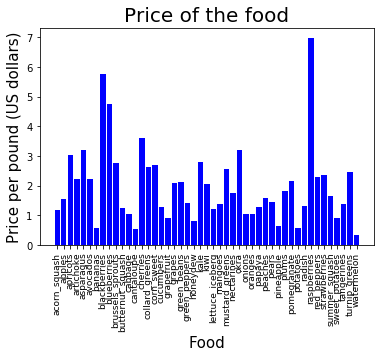

In [22]:
plt.bar(FV_Data['food'], FV_Data['price_per_lb'],align='center', color= 'b')

plt.title('Price of the food',fontsize=20 )
plt.xlabel("Food", fontsize=15)
plt.ylabel("Price per pound (US dollars)", fontsize=15)
plt.xticks(rotation=90, fontsize=9)

plt.show()

### How do the price distributions compare for fruit and vegetables?
__Ans:__ (1)The price distributions for fruit is skewed to the right, suggesting that some of fruits are extremly expensive. In contrast, The price distributions for fruit is mostly centered at \$ 2 per pound. (2) From the boxplot, the median price per pound for fruit and vegetable are similar.  

In [133]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [134]:
DF1 = FV_Data[['type','price_per_lb']]

Fruit_Price = DF1[[('fruit' in a) for a in DF1['type']]]
Veg_Price = DF1[[('vegetables' in a) for a in DF1['type']]]

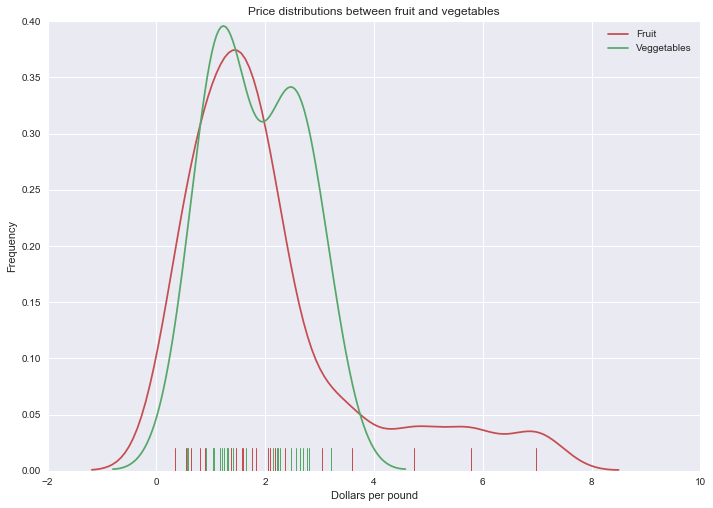

In [27]:
F = sns.distplot(Fruit_Price.iloc[:,1], hist=False, rug=True,color ='r',label="Fruit")
V = sns.distplot(Veg_Price.iloc[:,1], hist=False, rug=True,color ='g',label="Veggetables")
V.set(xlim=(-2,10), ylim=(0, 0.4))
V.set(title= "Price distributions between fruit and vegetables",xlabel='Dollars per pound', ylabel='Frequency')
plt.show()


C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


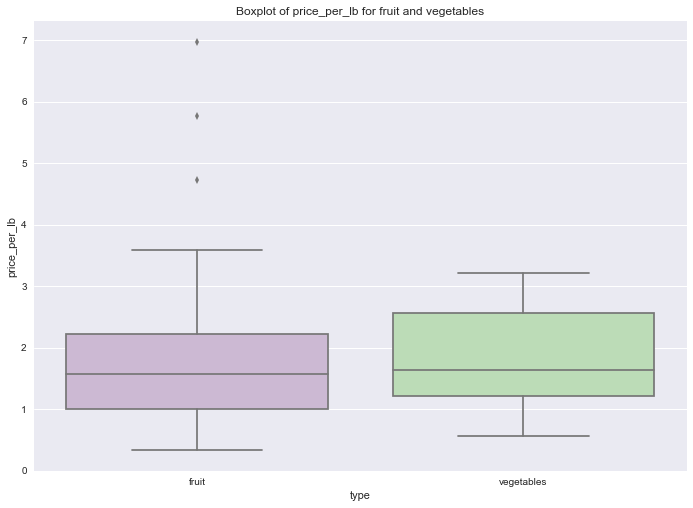

In [83]:
# boxplot
Boxplot = sns.boxplot(x="type", y="price_per_lb", data=FV_Data, palette="PRGn")
Boxplot.set(title= "Boxplot of price_per_lb for fruit and vegetables",xlabel='type', ylabel='price_per_lb')
plt.show()

### Which foods are the best value for the price?
__Ans:__ The best value is what we could spend the least money gaining the most weight of food. Under this assumption, I would calculate the the value of the price per pound divided by yield.  Then, the minimun of it indicates the food with the best value. My evauation suggests that <strong style="color:#B0B">watermelon</strong> is the food with the cheapest price per edible protion (by pound).

In [98]:
price_per_edible_lb = FV_Data.iloc[:,4] / FV_Data.iloc[:,5] 

In [99]:
DF2 = FV_Data.copy()

In [100]:
DF2["price_per_edible_lb"] = price_per_edible_lb  # create a new column

In [101]:
DF2 = DF2.sort_values(by=['price_per_edible_lb']) # sort the dataframe by ___

In [102]:
# watermelon is the food with the cheapest price per edible protion (by pound)
DF2.head()

,index,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup,price_per_edible_lb
23,2,fruit,watermelon,Fresh1,0.333412,0.520000,0.330693,0.212033,0.641177
43,2,vegetables,potatoes,Fresh1,0.564320,0.811301,0.264555,0.184017,0.695574
30,2,vegetables,cabbage,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,0.743722
2,2,fruit,bananas,Fresh1,0.566983,0.640000,0.330693,0.292965,0.885912
5,2,fruit,cantaloupe,Fresh1,0.535874,0.510000,0.374786,0.393800,1.050733


C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


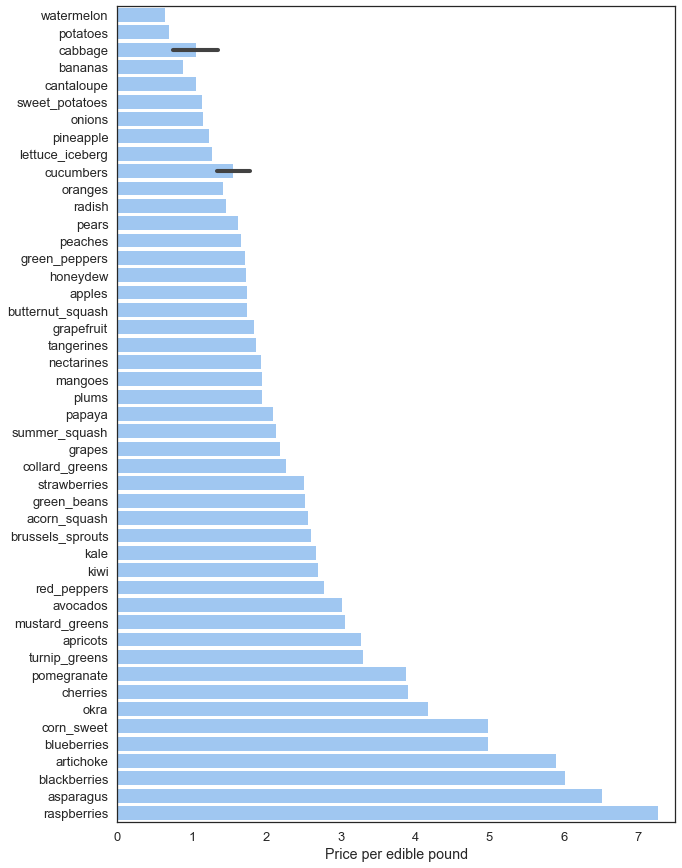

In [103]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

# Plotting
sns.set_color_codes("pastel")
# sns.barplot(x='price_per_edible_lb', y='food', data= DF2, label="The less price_per_edible_lb is better", color="b")
sns.barplot(x='price_per_edible_lb', y='food', data= DF2, color="b")

# Add a legend and informative axis label
# ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(0, 7.5), ylabel="", xlabel="Price per edible pound")

plt.show()

### What's something surprising about this data set?
__(1)__ Considering the yeild factor and price per pound (price per edible pound), Raspberries is much more expensive than my thought. Also, my old thought about corn sweet is cheap, since US has the corn belt in the midwest. However, Corn_sweet is also in the top 6 expensive out of 49 food. This is really a suprise to me and reminds me of looking at data integrally (like considering the yeild and price per pound).

In [104]:
DF2[['food','price_per_edible_lb']].sort_values(by=['price_per_edible_lb'], ascending= False).head(10)

,food,price_per_edible_lb
20,raspberries,7.266470
26,asparagus,6.507216
3,blackberries,6.015321
25,artichoke,5.896615
4,blueberries,4.983812
33,corn_sweet,4.982635
41,okra,4.176299
6,cherries,3.905424
19,pomegranate,3.881411
48,turnip_greens,3.295665


__(2)__ By the definition of yield, it is the portion than edible. The weird part of the data set is that the yield of collard_greens,brussels_sprouts, and kale are larger than one. Probably, there were some calculation error for the yield.

In [108]:
FV_Data[['food','yield']].sort_values(by=['yield'], ascending= False).head(3)

,food,yield
32,collard_greens,1.16
28,brussels_sprouts,1.06
38,kale,1.05


__(3) The suprise in the data set (excel files)__ During the process of data combination and extraction, I encouter many unexpected surprises. I realized that any incorrect format, inconsistent structure, and missing values cause many hurdles to overcome.

### Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

__Ans__ First, without knowing the nutrition, the top 5 of "best value for price (yield is already considered under this criteria)" is watermelon, potatoes, cabbages, bananas, cabbages, and cantaloupe. Just based on my limited knowledge of food nutrition, bananas seems to provide good nutrition than others. Thus, I would expect bananas to provide the best combination of price, yield, and nutrition. 

In [121]:
# Top 10 of " best value for price" Note: the lower the bttter
DF2.iloc[:10,[2,8]]

,food,price_per_edible_lb
23,watermelon,0.641177
43,potatoes,0.695574
30,cabbage,0.743722
2,bananas,0.885912
5,cantaloupe,1.050733
47,sweet_potatoes,1.132621
42,onions,1.153452
17,pineapple,1.230710
39,lettuce_iceberg,1.276884
34,cucumbers,1.336012
